In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate a small dataset with normal and anomalous data
time = pd.date_range(start='2023-01-01', periods=100, freq='h')

# Simulate normal temperatures (mean=75°C, standard deviation=10°C)
temperature1 = np.random.normal(loc=75, scale=10, size=100)
temperature2 = np.random.normal(loc=75, scale=10, size=100)
temperature3 = np.random.normal(loc=75, scale=10, size=100)
temperature4 = np.random.normal(loc=75, scale=10, size=100)

# Simulate pressure (mean=30 atm, standard deviation=5 atm)
pressure = np.random.normal(loc=30, scale=5, size=100)

# Introduce downward anomalies in one of the temperatures
temperature1[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature2[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature3[15:20] = np.random.normal(loc=20, scale=5, size=5)  
temperature4[15:20] = np.random.normal(loc=20, scale=5, size=5) 

temperature1[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature2[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature3[30:35] = np.random.normal(loc=18, scale=5, size=5)  
temperature4[30:35] = np.random.normal(loc=18, scale=5, size=5) 

temperature1[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature2[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature3[50:55] = np.random.normal(loc=25, scale=5, size=5)  
temperature4[50:55] = np.random.normal(loc=25, scale=5, size=5) 

temperature1[80:83] = np.random.normal(loc=20, scale=5, size=3)  
temperature2[80:83] = np.random.normal(loc=20, scale=5, size=3)  
temperature3[80:83] = np.random.normal(loc=20, scale=5, size=3)   
temperature4[80:83] = np.random.normal(loc=20, scale=5, size=3) 

temperature1[85:88] = np.random.normal(loc=21, scale=5, size=3)  
temperature2[85:88] = np.random.normal(loc=21, scale=5, size=3)  
temperature3[85:88] = np.random.normal(loc=21, scale=5, size=3)   
temperature4[85:88] = np.random.normal(loc=21, scale=5, size=3)

temperature1[92:95] = np.random.normal(loc=25, scale=5, size=3)
temperature2[92:95] = np.random.normal(loc=25, scale=5, size=3)  
temperature3[92:95] = np.random.normal(loc=25, scale=5, size=3)   
temperature4[92:95] = np.random.normal(loc=25, scale=5, size=3)  

# Simulate missing values (0) for temperature data
temperature1[10:12] = 0
temperature2[40:42] = 0
temperature3[60:62] = 0
temperature4[80:82] = 0

# Create a DataFrame
df = pd.DataFrame({
    'time': time,
    'temperature1': temperature1,
    'temperature2': temperature2,
    'temperature3': temperature3,
    'temperature4': temperature4,
    'pressure': pressure
})


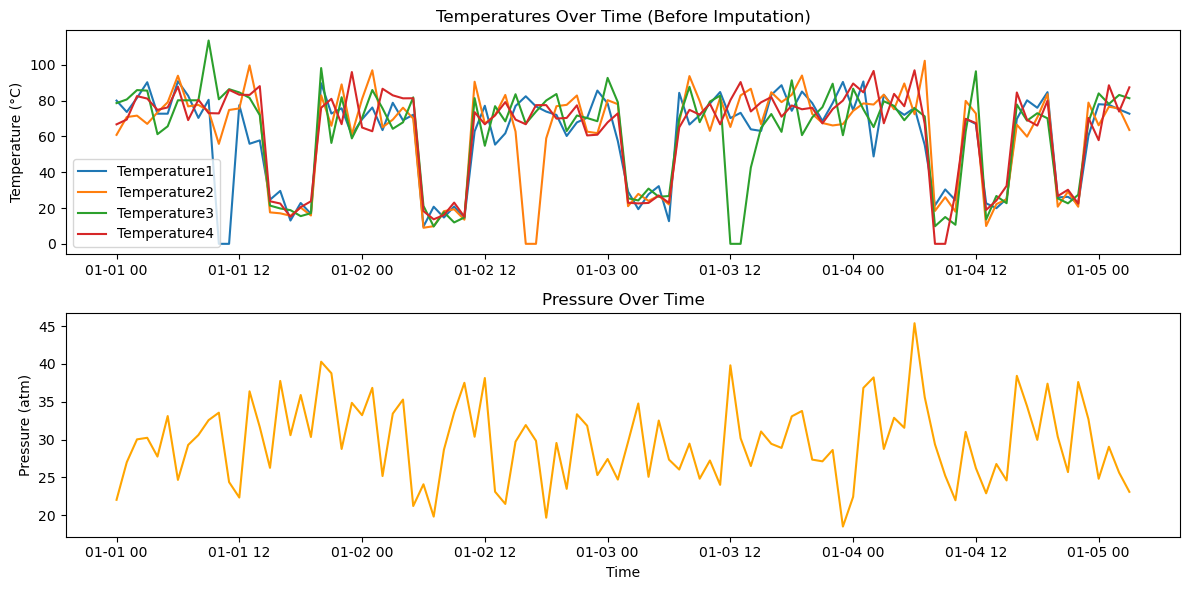

In [5]:
# Visualize the data before imputation
plt.figure(figsize=(12, 6))

# Plot temperature1, temperature2, temperature3, temperature4
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['temperature1'], label='Temperature1')
plt.plot(df['time'], df['temperature2'], label='Temperature2')
plt.plot(df['time'], df['temperature3'], label='Temperature3')
plt.plot(df['time'], df['temperature4'], label='Temperature4')
plt.title('Temperatures Over Time (Before Imputation)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['pressure'], label='Pressure', color='orange')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (atm)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()


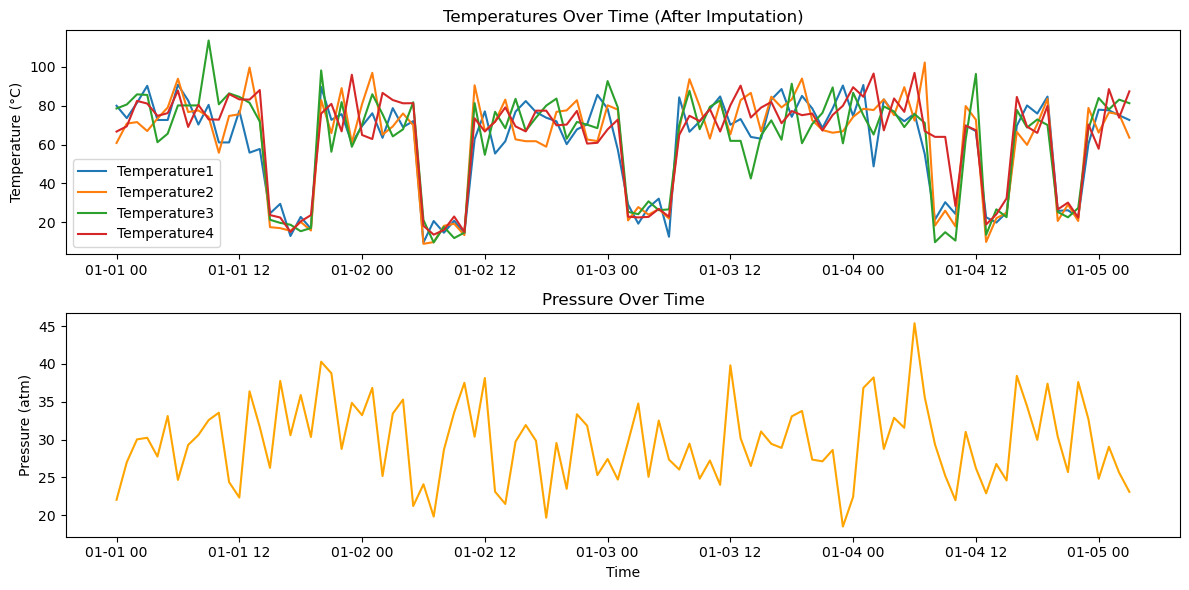

In [6]:
# Impute missing values (0) with the column mean
df_imputed = df.copy()
df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']] = df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']].replace(0, np.nan)
df_imputed.fillna(df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']].mean(), inplace=True)

# Visualize the data after imputation
plt.figure(figsize=(12, 6))

# Plot temperature1, temperature2, temperature3, temperature4 (After Imputation)
plt.subplot(2, 1, 1)
plt.plot(df_imputed['time'], df_imputed['temperature1'], label='Temperature1')
plt.plot(df_imputed['time'], df_imputed['temperature2'], label='Temperature2')
plt.plot(df_imputed['time'], df_imputed['temperature3'], label='Temperature3')
plt.plot(df_imputed['time'], df_imputed['temperature4'], label='Temperature4')
plt.title('Temperatures Over Time (After Imputation)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df_imputed['time'], df_imputed['pressure'], label='Pressure', color='orange')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (atm)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()


## Distributions

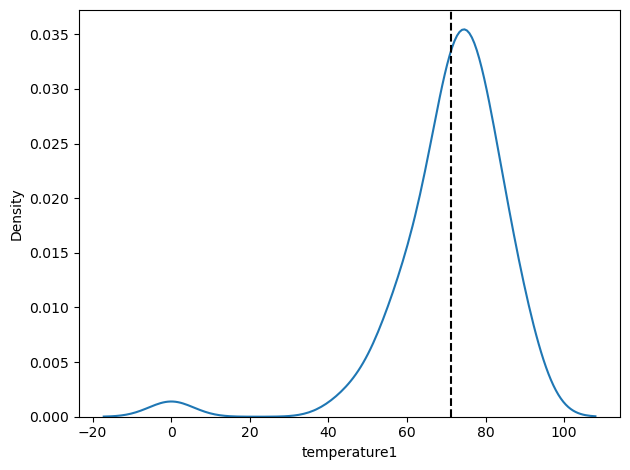

In [6]:
import seaborn as sns  # Imports seaborn, a statistical data visualization library

# Creates a Kernel Density Estimation (KDE) plot of temperature distribution
sns.kdeplot(df['temperature1'])  # Shows the probability density of temperature values

plt.grid(False)  # Removes the grid lines from the plot

# Adds a vertical line at x=0.134 spanning from y=0 to y=1
plt.axvline(df['temperature1'].mean(), 0, 1, c='black', ls='--')  # Black dashed line

plt.tight_layout()  # Adjusts the plot layout to fit in the figure area
plt.show()  # Displays the plot

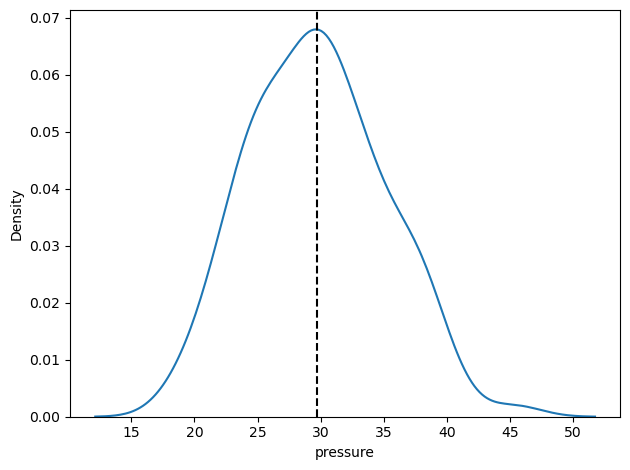

In [7]:
# Creates a Kernel Density Estimation (KDE) plot of pressure distribution
sns.kdeplot(df['pressure'])  # Shows the probability density of pressure values

plt.grid(False)  # Removes the grid lines from the plot

# Adds a vertical line at the mean pressure
plt.axvline(df['pressure'].mean(), 0, 1, c='black', ls='--')  # Black dashed line

plt.tight_layout()  # Adjusts the plot layout to fit in the figure area
plt.show()  # Displays the plot

In [10]:
# Calculate the mean temperature#

## Preprocess the data

In [8]:
# Select only the temperature columns for anomaly detection
temperature_data = df_imputed[['temperature1', 'temperature2', 'temperature3', 'temperature4']]

# Normalize the data
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(temperature_data)

## Apply Isolation Forest

In [9]:
# Create and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Assume ~5% of data is anomalous
iso_forest.fit(temperature_scaled)

# Predict anomalies
df_imputed['anomaly'] = iso_forest.predict(temperature_scaled)

# Map -1 to 1 for anomaly, 1 to 0 for normal
df_imputed['anomaly'] = df_imputed['anomaly'].map({-1: 1, 1: 0})



In [10]:
 df_imputed

,time,temperature1,temperature2,temperature3,temperature4,pressure,anomaly
0,2023-01-01 00:00:00,79.967142,60.846293,78.577874,66.710050,22.027862,0
1,2023-01-01 01:00:00,73.617357,70.793547,80.607845,69.398190,27.003125,0
2,2023-01-01 02:00:00,81.476885,71.572855,85.830512,82.472936,30.026218,0
3,2023-01-01 03:00:00,90.230299,66.977227,85.538021,81.103703,30.234903,0
4,2023-01-01 04:00:00,72.658466,73.387143,61.223306,74.790984,27.749673,0
...,...,...,...,...,...,...,...
95,2023-01-04 23:00:00,60.364851,78.853174,68.070904,70.308243,32.694550,0
96,2023-01-05 00:00:00,77.961203,66.161426,83.995999,57.868655,24.813769,0
97,2023-01-05 01:00:00,77.610553,76.537251,78.072995,88.538724,29.048307,0
98,2023-01-05 02:00:00,75.051135,75.582087,83.128621,73.854602,25.621909,0


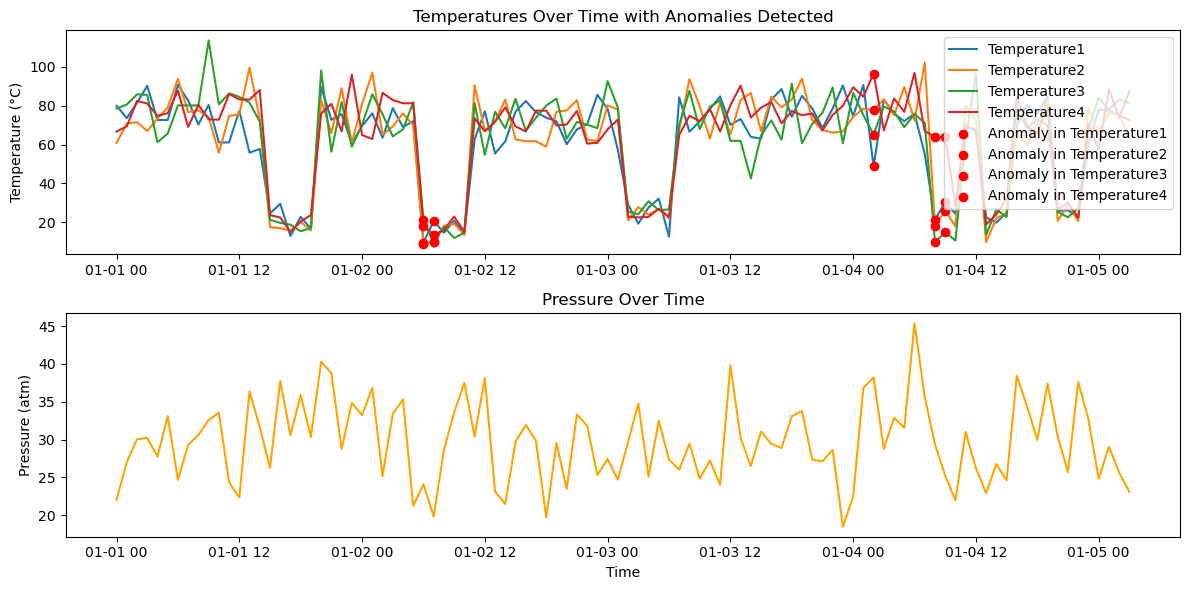

In [11]:
# Visualize anomalies
plt.figure(figsize=(12, 6))

# Plot temperature data with anomalies highlighted
plt.subplot(2, 1, 1)
plt.plot(df_imputed['time'], df_imputed['temperature1'], label='Temperature1')
plt.plot(df_imputed['time'], df_imputed['temperature2'], label='Temperature2')
plt.plot(df_imputed['time'], df_imputed['temperature3'], label='Temperature3')
plt.plot(df_imputed['time'], df_imputed['temperature4'], label='Temperature4')

# Highlight anomalies in red
plt.scatter(df_imputed['time'][df_imputed['anomaly'] == 1], df_imputed['temperature1'][df_imputed['anomaly'] == 1], color='red', label='Anomaly in Temperature1', zorder=5)
plt.scatter(df_imputed['time'][df_imputed['anomaly'] == 1], df_imputed['temperature2'][df_imputed['anomaly'] == 1], color='red', label='Anomaly in Temperature2', zorder=5)
plt.scatter(df_imputed['time'][df_imputed['anomaly'] == 1], df_imputed['temperature3'][df_imputed['anomaly'] == 1], color='red', label='Anomaly in Temperature3', zorder=5)
plt.scatter(df_imputed['time'][df_imputed['anomaly'] == 1], df_imputed['temperature4'][df_imputed['anomaly'] == 1], color='red', label='Anomaly in Temperature4', zorder=5)

plt.title('Temperatures Over Time with Anomalies Detected')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df_imputed['time'], df_imputed['pressure'], label='Pressure', color='orange')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (atm)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()


Explanation of the Code:

True Anomalies: The true_anomalies array is manually created to mark the time periods when we introduced the anomalies in the data.

For example, anomalies were injected in temperature1 between indices 30–35, temperature2 between 50–55, and temperature3 between 70–75.

Confusion Matrix:

confusion_matrix(true_anomalies, predicted_anomalies) compares the true anomaly labels with the predicted anomaly labels.

The true positives (TP) are the correctly predicted anomalies, the false positives (FP) are normal data incorrectly flagged as anomalies, the true negatives (TN) are correctly identified normal data, and the false negatives (FN) are actual anomalies missed by the model.

Confusion Matrix Display: ConfusionMatrixDisplay plots the confusion matrix with labeled axes (Normal vs Anomaly).

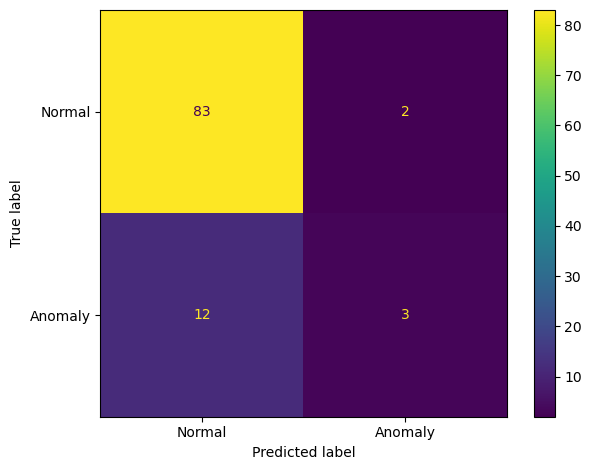

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulate true anomalies
# Let's assume anomalies occurred at the same time slots where we manually injected them in the dataset
# We mark anomalies as 1 (True Anomaly) and normal data as 0 (Normal)
true_anomalies = np.zeros(len(df_imputed))

# Mark the true anomalies based on the time indices we artificially created
# Anomalies in temperature1 (index 30 to 35)
true_anomalies[30:35] = 1
# Anomalies in temperature2 (index 50 to 55)
true_anomalies[50:55] = 1
# Anomalies in temperature3 (index 70 to 75)
true_anomalies[70:75] = 1

# Now, compare with the predicted anomalies from Isolation Forest
predicted_anomalies = df_imputed['anomaly'].values  # Anomaly predictions from Isolation Forest

# Confusion Matrix
cm = confusion_matrix(true_anomalies, predicted_anomalies)

# Display the confusion matrix
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp_cm.plot()

# Customize plot
plt.grid(False)
plt.tight_layout()
plt.show()


In [20]:
true_anomalies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# LOF

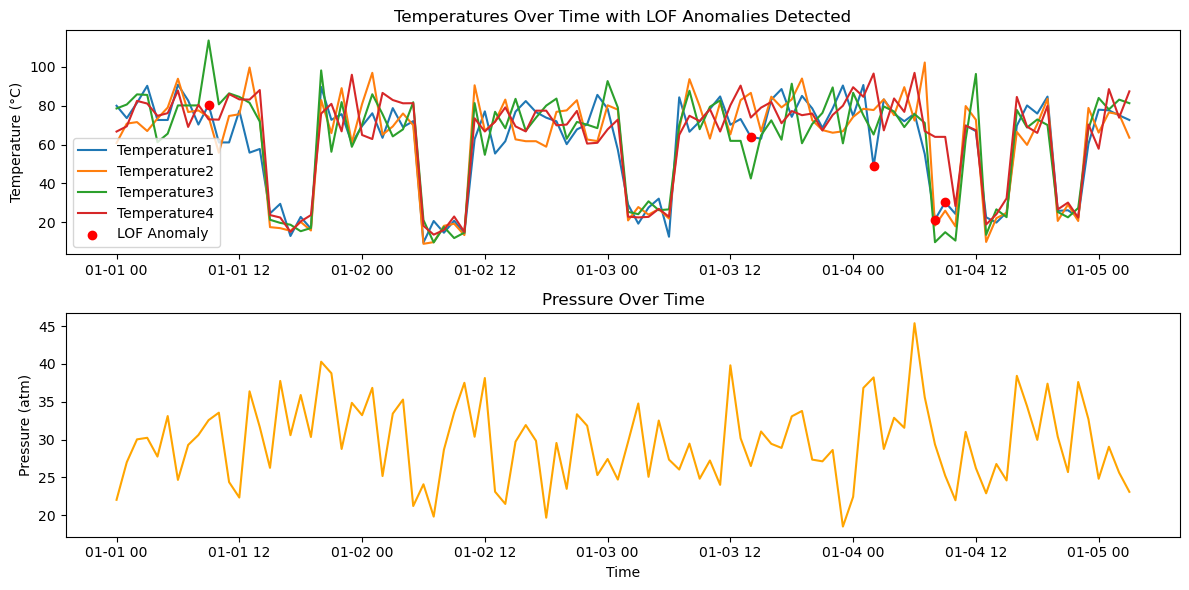

In [13]:
from sklearn.neighbors import LocalOutlierFactor

# Create and fit the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_predictions = lof.fit_predict(temperature_scaled)

# Add LOF predictions to the dataframe
df_imputed['lof_anomaly'] = [1 if x == -1 else 0 for x in lof_predictions]

# Visualize LOF anomalies
plt.figure(figsize=(12, 6))

# Plot temperature data with LOF anomalies highlighted
plt.subplot(2, 1, 1)
plt.plot(df_imputed['time'], df_imputed['temperature1'], label='Temperature1')
plt.plot(df_imputed['time'], df_imputed['temperature2'], label='Temperature2')
plt.plot(df_imputed['time'], df_imputed['temperature3'], label='Temperature3')
plt.plot(df_imputed['time'], df_imputed['temperature4'], label='Temperature4')

# Highlight LOF anomalies in red
plt.scatter(df_imputed['time'][df_imputed['lof_anomaly'] == 1], 
           df_imputed['temperature1'][df_imputed['lof_anomaly'] == 1], 
           color='red', label='LOF Anomaly', zorder=5)

plt.title('Temperatures Over Time with LOF Anomalies Detected')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot pressure
plt.subplot(2, 1, 2)
plt.plot(df_imputed['time'], df_imputed['pressure'], label='Pressure', color='orange')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (atm)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()